Deep Neural Network (DNN) - Krypton Example
=========================================
Deep Neural Network (DNN) with Tensor Flow (Keras)


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

import deepmods.notebook as ooo

ooo.init(id='15.1', save_figs=True)


Deepmod by pjluc 2019
  Version          : 0.4.1
  Run time         : Monday 14 October 2019, 10:37:29
  Run directory    : ./run/lab-15.1
  Save figs        : True
  Matplotlib style : deepmods/talk.mplstyle
  Hide warning     : True

TensorFlow version :  1.14.0
Keras version      :  2.2.4-tf

Init done.


## Retrieve data

In [2]:
img_rows, img_cols = 64,64

dataset_x=np.load('./data/Krypton64/dataset-x.npy')
dataset_y=np.load('./data/Krypton64/dataset-y.npy')

dataset_x, dataset_y = ooo.shuffle_dataset(dataset_x, dataset_y)

dataset_x = dataset_x.reshape( dataset_x.shape[0], img_rows, img_cols, 1)
dataset_x = dataset_x.astype('float32') / 255

x_train = dataset_x[:60000]
y_train = dataset_y[:60000]

x_test = dataset_x[60000:]
y_test = dataset_y[60000:]


input_shape = (img_rows, img_cols, 1)

# y_train = to_categorical(y_train)
# y_test  = to_categorical(y_test)


x_train :  (60000, 64, 64, 1)
y_train :  (60000,)
x_test  :  (10000, 64, 64, 1)
y_test  :  (10000,)


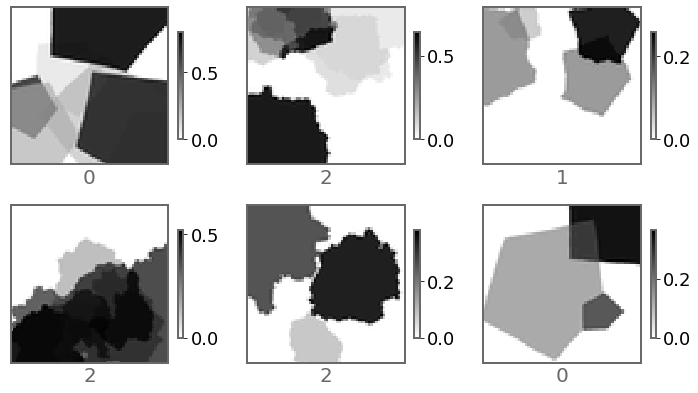

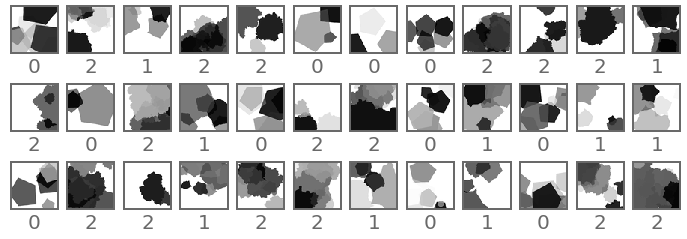

In [3]:
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)


ooo.plot_images(x_train.reshape(-1,img_rows,img_cols),y_train, range(6),  columns=3, x_size=4, y_size=3, 
                                colorbar=True,  y_pred=None,save_as='Examples-xl', cm='binary')
ooo.plot_images(x_train.reshape(-1,img_rows,img_cols),y_train, range(36), columns=12, x_size=1, y_size=1, 
                                colorbar=False, y_pred=None, save_as='Examples-xs', cm='binary')

## Create model

In [5]:
batch_size  =  64
num_classes =  3
epochs      =  5

with_checkpoint  = True
with_tensorboard = True
with_bestmodel   = True

In [6]:
model = keras.models.Sequential()
model.add( keras.layers.Conv2D(48, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 1))) #32
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Conv2D(96, (3, 3), activation='relu')) #32
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Conv2D(192,(3, 3), activation='relu')) #64
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Conv2D(256,(3, 3), activation='relu')) #64
model.add( keras.layers.MaxPooling2D((2, 2)))
model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(1024, activation='relu')) # 576
model.add( keras.layers.Dense(200, activation='relu'))
model.add( keras.layers.Dense(50, activation='relu'))
model.add( keras.layers.Dense(3, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks=[]
if with_tensorboard : callbacks.append( keras.callbacks.TensorBoard(log_dir=ooo.get_log_dir()) )
if with_checkpoint  : callbacks.append( keras.callbacks.ModelCheckpoint(ooo.get_check_dir()+'/model{epoch:02d}-{val_acc:.3f}.h5') )
if with_bestmodel   : callbacks.append( keras.callbacks.ModelCheckpoint(ooo.get_model_dir()+'/best_model.h5', save_best_only=True) )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 48)        480       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 96)        41568     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 192)       166080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 192)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         4

## Run it

In [7]:
%%time

history = model.fit(  x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test),
                      callbacks=callbacks)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 160s 3ms/sample - loss: 0.5220 - acc: 0.7349 - val_loss: 0.2351 - val_acc: 0.9054
Epoch 2/5
60000/60000 [==============================] - 175s 3ms/sample - loss: 0.1262 - acc: 0.9531 - val_loss: 0.1577 - val_acc: 0.9416
Epoch 3/5
60000/60000 [==============================] - 187s 3ms/sample - loss: 0.0816 - acc: 0.9706 - val_loss: 0.0903 - val_acc: 0.9659
Epoch 4/5
60000/60000 [==============================] - 173s 3ms/sample - loss: 0.0462 - acc: 0.9835 - val_loss: 0.0395 - val_acc: 0.9886
Epoch 5/5
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0356 - acc: 0.9871 - val_loss: 0.0197 - val_acc: 0.9938
CPU times: user 1h 21min 20s, sys: 47.5 s, total: 1h 22min 8s
Wall time: 14min 25s


## History

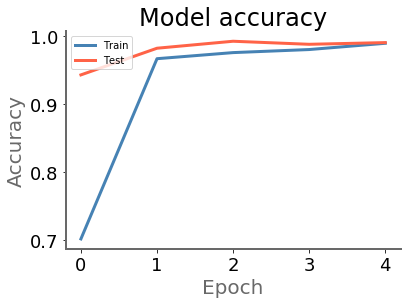

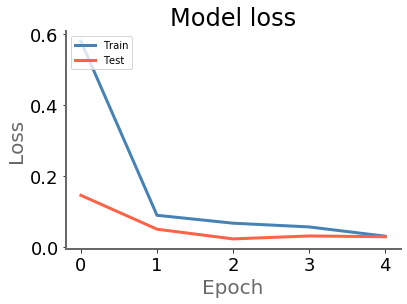

In [7]:
ooo.plot_history(history, figsize=(6,4), save_as="history")

## Best model Evaluation

In [9]:
print('Load best model... ', end='')
model = keras.models.load_model(ooo.get_model_dir()+'/best_model.h5')
print('Done.\n')

start_time=time.time()
score = model.evaluate(x_test, y_test, verbose=1)
end_time=time.time()

print('Test loss      : {:5.4f}'.format(score[0]))
print('Test accuracy  : {:5.4f}'.format(score[1]))
print('Test / 1 image : {:5.5f} ms'.format( 1000*(end_time-start_time)/x_test.shape[0]))

Load best model... Done.

10000/10000 [==============================] - 6s 613us/sample - loss: 0.0228 - acc: 0.9927
Test loss      : 0.0228
Test accuracy  : 0.9927
Test / 1 image : 0.61711 ms


## Confusion matrix

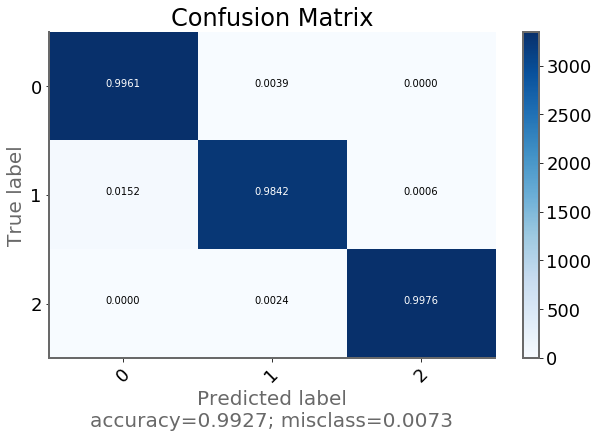

In [10]:
y_pred   = model.predict_classes(x_test)
conf_mat_op = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

with tf.Session():
    conf_mat = tf.Tensor.eval(conf_mat_op,feed_dict=None, session=None)

ooo.plot_confusion_matrix(cm       = conf_mat, 
                  normalize    = True,
                  target_names = range(3),
                  title        = "Confusion Matrix",
                  figsize      = (10,6) ,
                  save_as      = "Confusion-matrix")

## Errors

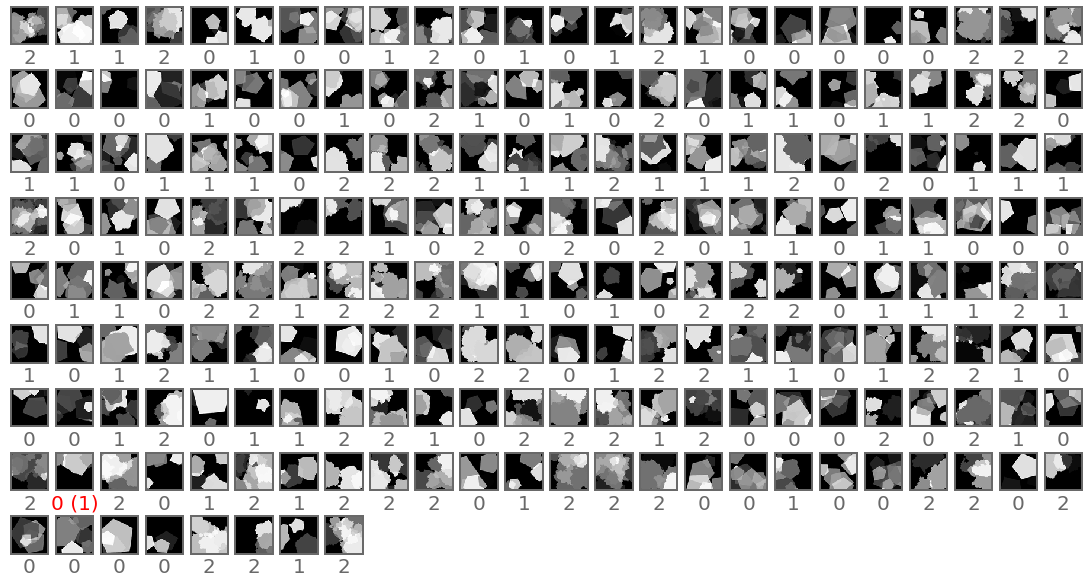

In [11]:
ooo.plot_images(x_test.reshape(-1,img_rows,img_cols), y_test, range(0,200), columns=24, x_size=0.8, y_size=0.8, y_pred=y_pred, cm='binary_r')

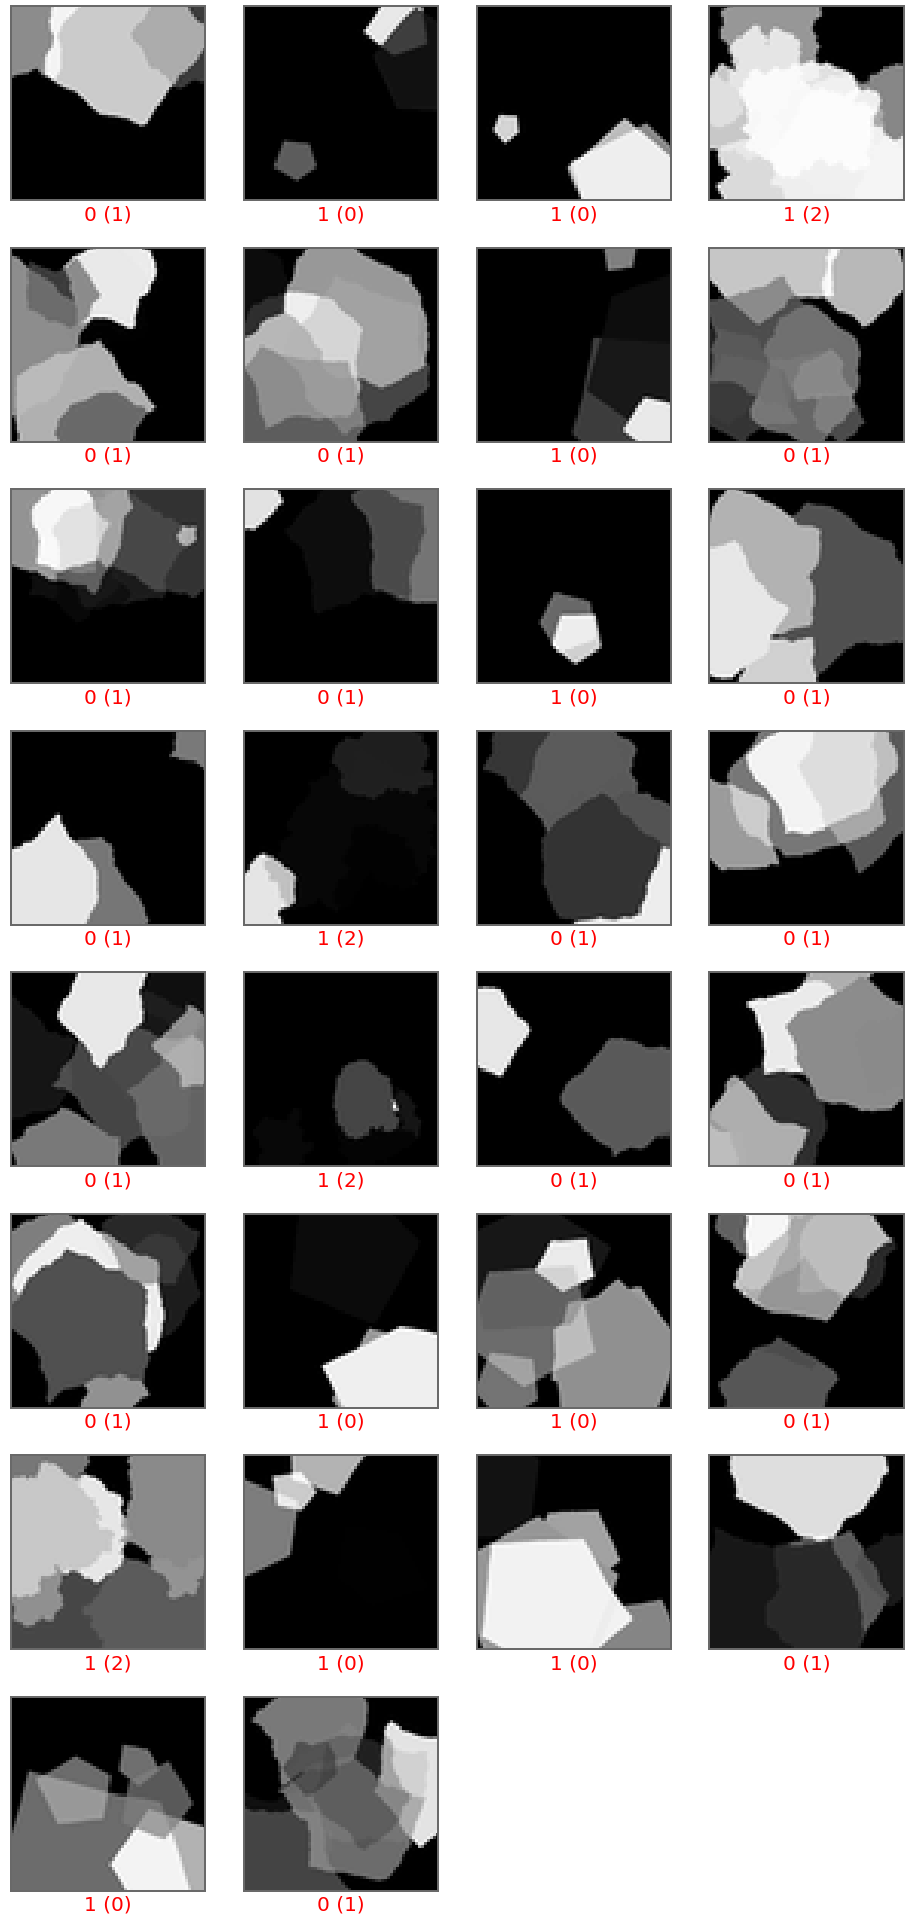

In [12]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
ooo.plot_images(x_test.reshape(-1,img_rows,img_cols), y_test, errors[:30], columns=4, x_size=4, y_size=4, y_pred=y_pred, cm='binary_r')